In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('/content/Bank_Personal_Loan_Modelling.xlsx',sheet_name=1)

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
#This is classification type problem beacuse the target values is descrete(in binary form) 

In [5]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
a = df.corr()
a

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024672,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050089,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004068,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024672,-0.052030,-0.050089,0.645993,-0.004068,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [8]:
df1 = df.drop(['ID','ZIP Code'],axis=1)

In [9]:
df1.drop_duplicates(inplace=True)

In [10]:
df1.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [11]:
df1_no = df1[df1['Personal Loan']==0] 

In [12]:
df1_yes = df1[df1['Personal Loan']==1]

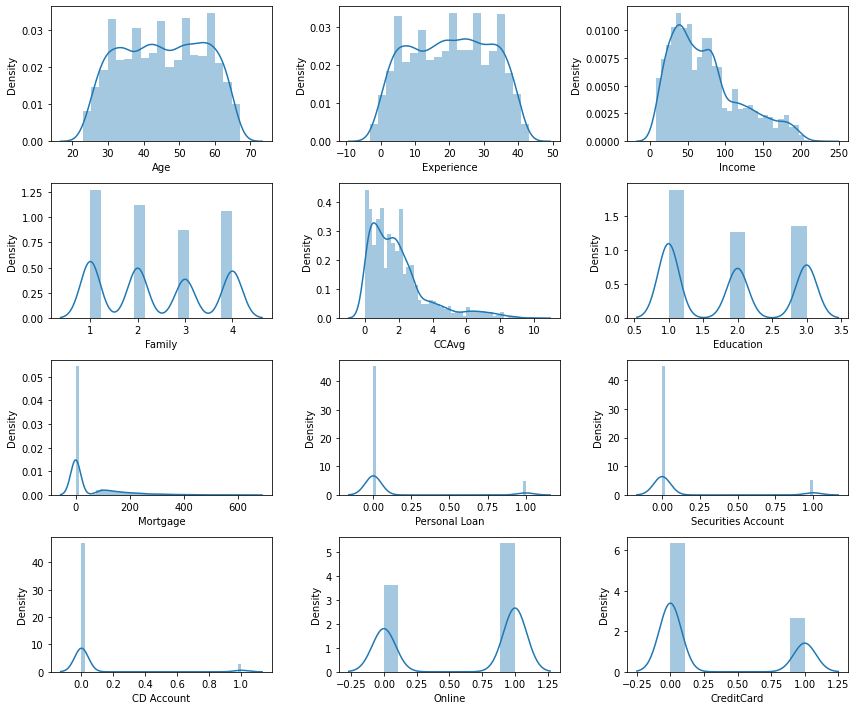

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
for i,j in zip(range(len(df1.columns)),df1.columns):
  plt.subplot(5,3,i+1)
  sns.distplot(df1[j])
  plt.tight_layout()

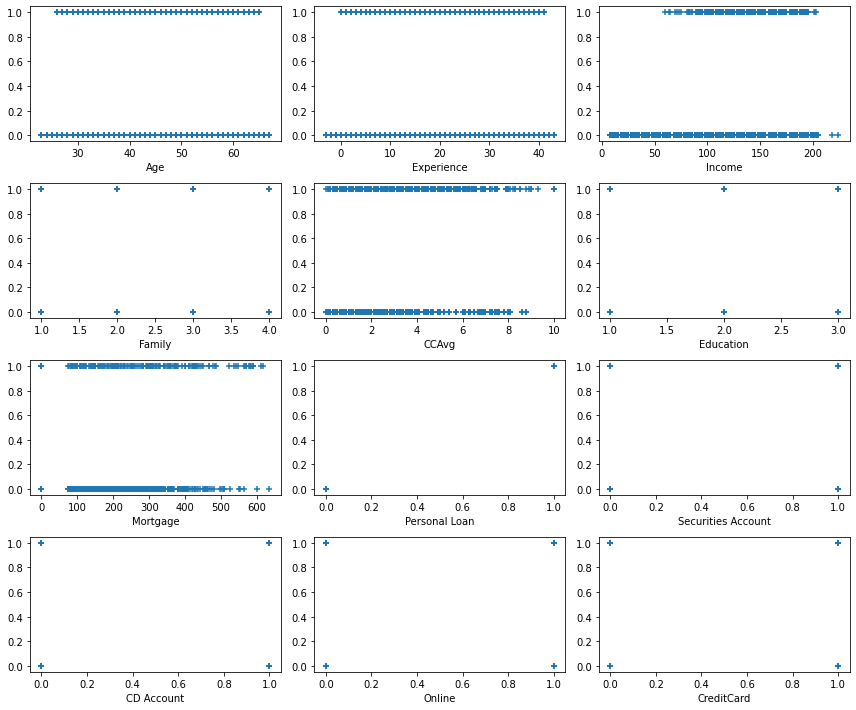

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
for i,j in zip(range(len(df1.columns)),df1.columns):
  plt.subplot(5,3,i+1)
  plt.scatter(df1[j],df1['Personal Loan'],marker='+')
  plt.xlabel('{}'.format(j))
  plt.tight_layout()

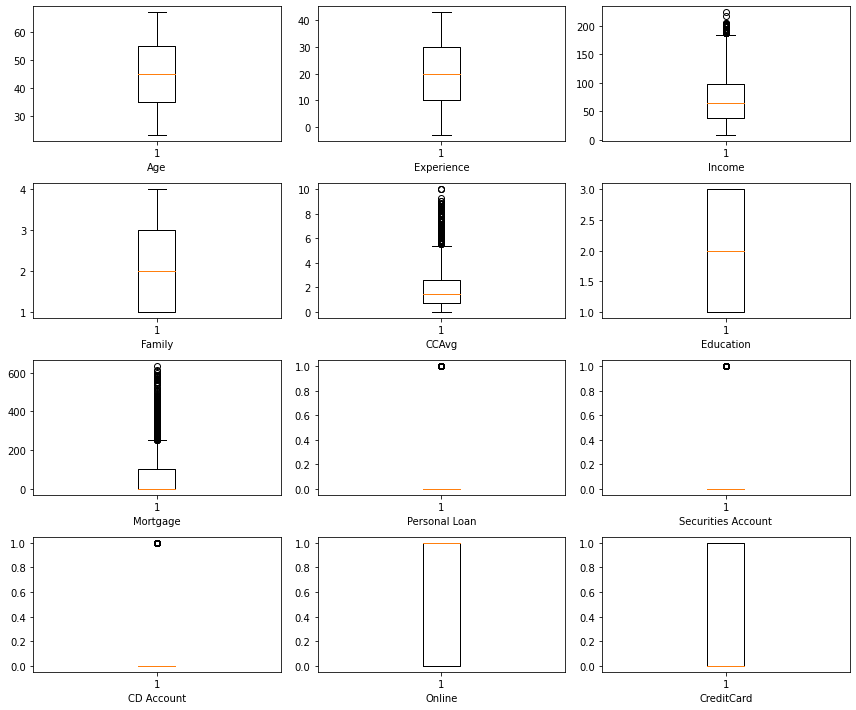

In [15]:
plt.figure(figsize=(12,12))
for i,j in zip(range(len(df1.columns)),df1.columns):
  plt.subplot(5,3,i+1)
  plt.boxplot(df1[j])
  plt.xlabel('{}'.format(j))
  plt.tight_layout()

#Application of machine learning algorithm


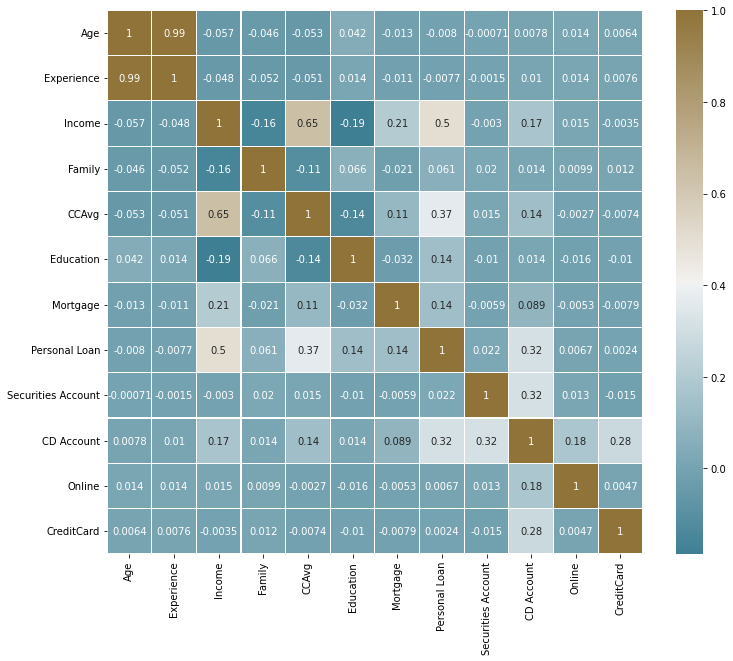

In [16]:
b = df1.corr()
plt.figure(figsize=(12,10))
cmap = sns.diverging_palette(220,420,as_cmap=True)
sns.heatmap(b,annot=True,linewidths=0.1, cmap = cmap)

In [17]:
x = df1.drop(['Personal Loan'], axis=1)
y = df1['Personal Loan']

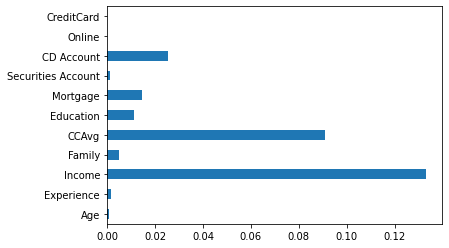

In [18]:
from sklearn.feature_selection import mutual_info_classif
imp = mutual_info_classif(x,y)
imp_fea = pd.Series(imp,x.columns)
imp_fea.plot(kind = 'barh')
plt.show()


In [19]:
x = df1[['CD Account','Mortgage','Education','CCAvg','Income']]

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=11)

In [21]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3989, 5), (998, 5), (3989,), (998,))

# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
a = lr.score(x_train,y_train)
b = lr.score(x_test,y_test)
print(a,b)

0.9448483329155176 0.9498997995991983


In [24]:
predict= lr.predict(x_test)

In [25]:
lr.get_params() # le.get_params

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,predict)
asc = accuracy_score(y_test, predict)
cm

array([[890,  13],
       [ 37,  58]])

In [27]:
asc

0.9498997995991983

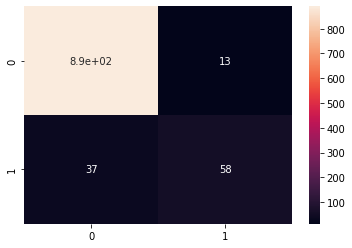

In [28]:
import seaborn as sns
sns.heatmap(cm, annot=True,cbar=True)

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict, target_names=['class0','class1']))

              precision    recall  f1-score   support

      class0       0.96      0.99      0.97       903
      class1       0.82      0.61      0.70        95

    accuracy                           0.95       998
   macro avg       0.89      0.80      0.84       998
weighted avg       0.95      0.95      0.95       998



#Logistic Weight

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.6,random_state=11, stratify = y)

In [31]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1994, 5), (2993, 5), (1994,), (2993,))

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression(solver='newton-cg', class_weight='balanced')
lr.fit(x_train,y_train)

pred = lr.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score , f1_score
f1_test = f1_score(y_test,pred)
print('f1 score for the testing data:' , f1_test)

accuracy_sc = accuracy_score(y_test,pred)
print(accuracy_sc)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred , target_names=['class0','class1']))

f1 score for the testing data: 0.608284023668639
0.8894086201135984
[[2405  300]
 [  31  257]]
              precision    recall  f1-score   support

      class0       0.99      0.89      0.94      2705
      class1       0.46      0.89      0.61       288

    accuracy                           0.89      2993
   macro avg       0.72      0.89      0.77      2993
weighted avg       0.94      0.89      0.90      2993



In [33]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
skf = StratifiedKFold(n_splits= 5)
skf.get_n_splits(x,y)

5

In [34]:
for train_index, test_index in skf.split(x,y):
  x_train, x_test = x.iloc[train_index], x.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  lr = LogisticRegression()
  lr.fit(x_train,y_train)
  pred = lr.predict(x_test)
  print(lr.score(x_train,y_train))
  print(confusion_matrix(y_test,pred))
  print(classification_report(y_test,pred, target_names=['class0','class1']))

0.9456004011030333
[[887  15]
 [ 34  62]]
              precision    recall  f1-score   support

      class0       0.96      0.98      0.97       902
      class1       0.81      0.65      0.72        96

    accuracy                           0.95       998
   macro avg       0.88      0.81      0.84       998
weighted avg       0.95      0.95      0.95       998

0.9493607420406117
[[884  18]
 [ 44  52]]
              precision    recall  f1-score   support

      class0       0.95      0.98      0.97       902
      class1       0.74      0.54      0.63        96

    accuracy                           0.94       998
   macro avg       0.85      0.76      0.80       998
weighted avg       0.93      0.94      0.93       998

0.9463659147869674
[[891  10]
 [ 38  58]]
              precision    recall  f1-score   support

      class0       0.96      0.99      0.97       901
      class1       0.85      0.60      0.71        96

    accuracy                           0.95       997
  

# Random Forest

In [35]:
x = df1.drop(['Personal Loan'], axis=1)
y = df1['Personal Loan']

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state =101)


In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000,oob_score=True) # oob score take care of overfitting and can be used for evaluating and validating the model
rfc.fit(x_train,y_train)
#Random Forest does not require split sampling method to assess accuracy of the model. 
#It performs internal validation as 2-3rd of available training data is used to grow 
#each tree and the remaining one-third portion of training data always used to calculate out-of bag error to assess model performance.

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
pred = rfc.predict(x_test)

In [39]:
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

[[899   1]
 [ 13  85]]
0.9859719438877755
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       900
           1       0.99      0.87      0.92        98

    accuracy                           0.99       998
   macro avg       0.99      0.93      0.96       998
weighted avg       0.99      0.99      0.99       998



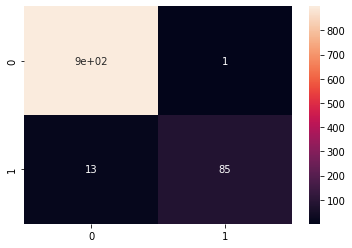

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,pred) 
sns.heatmap(cm,annot=True,cbar=True)

In [41]:
feat=[]
impt=[]
for feature, imp in zip(x,rfc.feature_importances_):
  print(feature,imp)
  feat.append(feature)
  impt.append(imp)

Age 0.03668739965322793
Experience 0.03742959397494682
Income 0.34153282817741304
Family 0.1194160417774723
CCAvg 0.16087971793876038
Education 0.19797608260084265
Mortgage 0.03497181830755025
Securities Account 0.004714559129590621
CD Account 0.050995822449867945
Online 0.006970640189606295
CreditCard 0.008425495800721881


<BarContainer object of 11 artists>

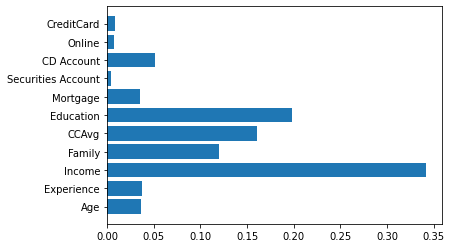

In [42]:
plt.barh(feat,impt)

In [43]:
y = df['Personal Loan']
x=df[['Income', 'Family', 'CCAvg', 'Education']]

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state =101)

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000,oob_score=True) # oob score take care of overfitting and can be used for evaluating and validating the model
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
pred = rfc.predict(x_test)

In [47]:
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

[[909   4]
 [ 10  77]]
0.986
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       913
           1       0.95      0.89      0.92        87

    accuracy                           0.99      1000
   macro avg       0.97      0.94      0.95      1000
weighted avg       0.99      0.99      0.99      1000



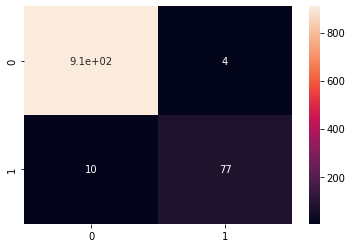

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,pred) 
sns.heatmap(cm,annot=True,cbar=True)

In [49]:
from sklearn import *

In [50]:
tree_mdl = tree.DecisionTreeClassifier()
tree_mdl.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

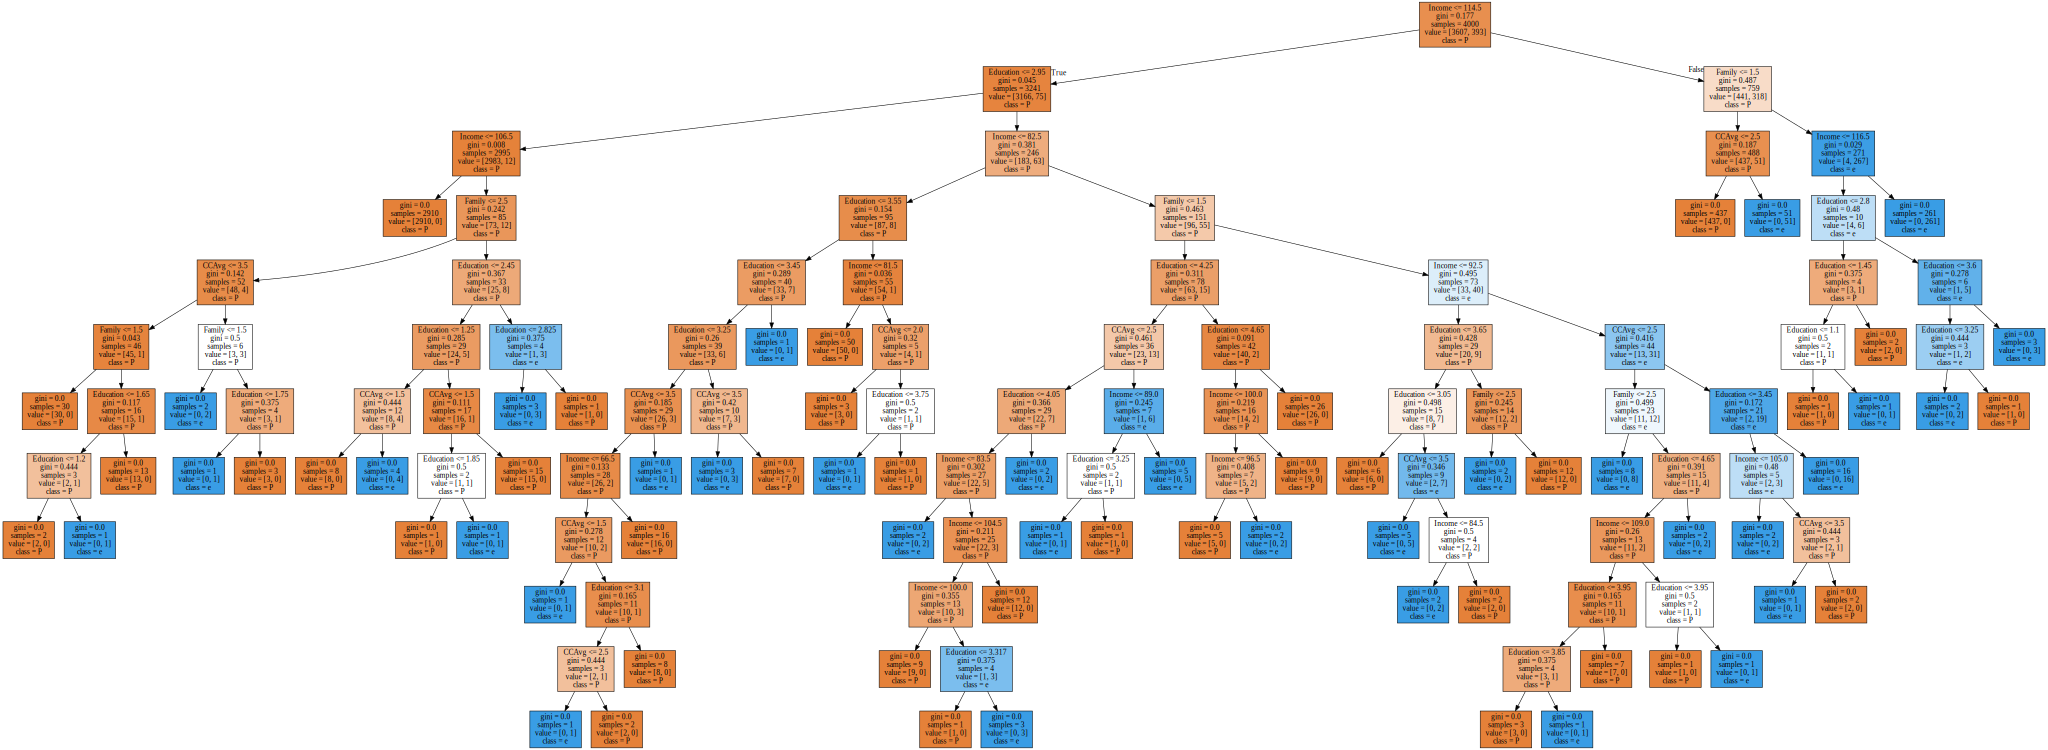

In [51]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(tree_mdl, out_file=None, 
                                feature_names= ['Income', 'CCAvg', 'Education','Family'],  
                                class_names='Personal Loan',
                                filled=True)
# here feature name we put that will shown on tree and also same with class names
# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

# here there are total 889 samples in which 549 are not survived i.e zero and 340 are survived i.e. 1
#549 represent not survived and 340 represent survived
# after that it split into female==True==0 and male==false==1

In [52]:
from sklearn.model_selection import StratifiedKFold
skf= StratifiedKFold(n_splits=5)
skf.get_n_splits(x,y)

5

In [53]:
for train_index, test_index in skf.split(x, y):
  x_train, x_test = x.iloc[train_index], x.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  rfc = RandomForestClassifier(n_estimators=100, oob_score=True)
  rfc.fit(x_train,y_train)
  pred = rfc.predict(x_test)
  print(metrics.accuracy_score(y_test, pred))
  cm = confusion_matrix(y_test,pred)
  print(classification_report(y_test, pred, target_names=['class0','class1']))
  print(cm)

0.987
              precision    recall  f1-score   support

      class0       0.99      1.00      0.99       904
      class1       0.97      0.90      0.93        96

    accuracy                           0.99      1000
   macro avg       0.98      0.95      0.96      1000
weighted avg       0.99      0.99      0.99      1000

[[901   3]
 [ 10  86]]
0.984
              precision    recall  f1-score   support

      class0       0.98      1.00      0.99       904
      class1       0.98      0.85      0.91        96

    accuracy                           0.98      1000
   macro avg       0.98      0.93      0.95      1000
weighted avg       0.98      0.98      0.98      1000

[[902   2]
 [ 14  82]]
0.982
              precision    recall  f1-score   support

      class0       0.98      1.00      0.99       904
      class1       0.95      0.85      0.90        96

    accuracy                           0.98      1000
   macro avg       0.97      0.92      0.95      1000
weighted a

# K Nearest Neighbour

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix , accuracy_score ,classification_report

In [64]:
x = df[['Income', 'CCAvg', 'Education','CD Account','Mortgage']]
y = df['Personal Loan']

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=100, test_size=0.3)

In [70]:
n_neighbors = [1,3,5,7,9]
for i in n_neighbors:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred = knn.predict(x_test)
  acc = accuracy_score(y_test,pred)
  score = knn.score(x_train,y_train)
  print( 'accuracy score of', i ,'is' , score)
  print( 'accuracy score of', i ,'is' , acc)

accuracy score of 1 is 0.9994285714285714
accuracy score of 1 is 0.9206666666666666
accuracy score of 3 is 0.9585714285714285
accuracy score of 3 is 0.922
accuracy score of 5 is 0.9488571428571428
accuracy score of 5 is 0.918
accuracy score of 7 is 0.946
accuracy score of 7 is 0.9186666666666666
accuracy score of 9 is 0.9417142857142857
accuracy score of 9 is 0.9146666666666666


In [71]:
# select n_neighbor as 3 beacuse it gives good accuracy
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
acc = accuracy_score(y_test,pred)
score = knn.score(x_train,y_train)
print(acc)
print(score)

0.922
0.9585714285714285


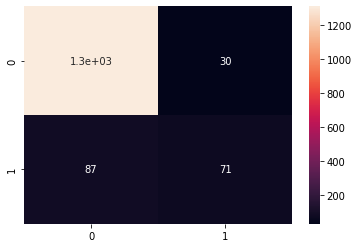

In [73]:
import seaborn as sns
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm, annot=True,cbar= True)

In [74]:
print(classification_report(y_test,pred, target_names=['class0','class1']))

              precision    recall  f1-score   support

      class0       0.94      0.98      0.96      1342
      class1       0.70      0.45      0.55       158

    accuracy                           0.92      1500
   macro avg       0.82      0.71      0.75      1500
weighted avg       0.91      0.92      0.91      1500



# SVM


In [75]:
from sklearn.svm import SVC
svc = SVC(gamma=0.001, C=100)

In [78]:
svc.fit(x_train,y_train)
pred = svc.predict(x_test)

In [81]:
acc = accuracy_score(y_test,pred)
cm = confusion_matrix(y_test,pred)


In [83]:
print(classification_report(y_test,pred,target_names=['class0','class1']))

              precision    recall  f1-score   support

      class0       0.94      0.99      0.96      1342
      class1       0.83      0.47      0.60       158

    accuracy                           0.93      1500
   macro avg       0.89      0.73      0.78      1500
weighted avg       0.93      0.93      0.93      1500



In [84]:
print(acc)
print(cm)

0.9346666666666666
[[1327   15]
 [  83   75]]
